In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import re

In [2]:
data=pd.read_csv('Data.csv')
data

headline  \
0                        1919: The Year of the Crack-Up   
1                         In Search of Lost Screen Time   
2     Warren Wells, Star Receiver With a Derailed Ca...   
3                          2019: The Year of the Wolves   
4                        Why Trump Reigns as King Cyrus   
...                                                 ...   
4477  As Trump Demands His Wall, Lawmakers Plead for...   
4478  U.S. Appears to Soften Timing for List of Nort...   
4479  Dusan Makavejev, 86. Eyebrow-Raising Serbian D...   
4480  A Year Into the Overlooked Project, Widening t...   
4481        The Alarming Allure of Australia’s Brumbies   

                                               abstract  \
0     From the Treaty of Versailles to Prohibition, ...   
1     Imagine what we could do with our money, and h...   
2     Wells was a deep threat for the vaunted Oaklan...   
3         Can the Constitution withstand the partisans?   
4     The Christian right doesn’t like the president...   
...                                                 ...   
4477  Lawmakers reacted with concern and bewildermen...   
4478  A top diplomat said the Trump administration m...   
4479  His films, among them “WR: Mysteries of the Or...   
4480  In the past year, The Times published obituari...   
4481  The environment is being sacrificed for a nati...   

                      pub date                original  person rank  \
0     2019-01-01T00:00:03+0000           By Ted Widmer            1   
1     2019-01-01T00:00:07+0000       By Paul Greenberg            1   
2     2019-01-01T00:08:04+0000    By Daniel E. Slotnik            1   
3     2019-01-01T00:15:31+0000         By David Brooks            1   
4     2019-01-01T00:29:12+0000    By Katherine Stewart            1   
...                        ...                     ...          ...   
4477  2019-01-31T23:41:47+0000       By Emily Cochrane            1   
4478  2019-01-31T23:47:23+0000          By Edward Wong            1   
4479  2019-01-31T23:55:38+0000      By Neil Genzlinger            1   
4480  2019-01-31T23:57:57+0000       By Amisha Padnani            1   
4481  2019-01-31T23:59:55+0000  By A. Odysseus Patrick            1   

                                               keywords  \
0     ['United States Politics and Government', 'New...   
1                       ['Smartphones', 'Social Media']   
2     ['Wells, Warren (1942-2018)', 'Football', 'Dea...   
3     ['Trump, Donald J', 'United States Politics an...   
4     ['United States Politics and Government', 'Bib...   
...                                                 ...   
4477  ['Border Barriers', 'Trump, Donald J', 'United...   
4478  ['United States International Relations', 'ARM...   
4479  ['Makavejev, Dusan', 'Deaths (Obituaries)', 'M...   
4480  ['Women and Girls', 'Race and Ethnicity', 'Gor...   
4481        ['Invasive Species', 'Horses', 'Australia']   

                                         lead paragraph   news desk  \
0     Throughout 2019, The New York Times Opinion se...        OpEd   
1     More than three-quarters of all Americans own ...        OpEd   
2     Warren Wells, a former wide receiver who becam...       Obits   
3     In Willa Cather’s novel “My Antonia,” there ar...        OpEd   
4     The month before the 2018 midterms, a thousand...        OpEd   
...                                                 ...         ...   
4477  WASHINGTON — President Trump proclaimed on Thu...  Washington   
4478  WASHINGTON — A top American diplomat signaled ...  Washington   
4479  Dusan Makavejev, a Serbian director whose movi...       Obits   
4480  Times Insider explains who we are and what we ...     Insider   
4481  SYDNEY, Australia — Since this country’s found...        OpEd   

       section name type of material  
0           Opinion            Op-Ed  
1           Opinion            Op-Ed  
2        Obituaries  Obituary (Obit)  
3           Opinion            Op-Ed  
4           Opinion

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482 entries, 0 to 4481
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   headline          4482 non-null   object
 1   abstract          4482 non-null   object
 2   pub date          4482 non-null   object
 3   original          3989 non-null   object
 4   person rank       4482 non-null   int64 
 5   keywords          4482 non-null   object
 6   lead paragraph    4456 non-null   object
 7   news desk         4431 non-null   object
 8   section name      4482 non-null   object
 9   type of material  4481 non-null   object
dtypes: int64(1), object(9)
memory usage: 350.3+ KB


In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 4481
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   headline          3921 non-null   object
 1   abstract          3921 non-null   object
 2   pub date          3921 non-null   object
 3   original          3921 non-null   object
 4   person rank       3921 non-null   int64 
 5   keywords          3921 non-null   object
 6   lead paragraph    3921 non-null   object
 7   news desk         3921 non-null   object
 8   section name      3921 non-null   object
 9   type of material  3921 non-null   object
dtypes: int64(1), object(9)
memory usage: 337.0+ KB


### Original

In [5]:
#Checking if there is a connection between the original (author of the article) and the news desk (tagging) and section name (sub-tagging)

In [6]:
mean_value = data['original'].value_counts().mean()
median_value = data['original'].value_counts().median()

plt.figure(figsize=(20, 500))
sns.countplot(data=data, y='original')
plt.title('Amount of articles per Original (writer)')
plt.xlabel('Count')
plt.ylabel('original')
sns.set_style("dark")
sns.despine(left=True)
plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_value))
plt.axvline(x=median_value, color='g', linestyle='--', label='Median: {:.2f}'.format(median_value))
plt.legend()
plt.show()

C:\Users\liron firuz\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [7]:
#Looking at the distribution of number of articles per writer, it can be seen according to the median that most writers wrote only one article within the dates we requested. 
#The median is one which indicates that the maximum value 35 is an outlier, and there are more outlier in the data

In [8]:
count_news_desk_sub_per_original=data[['headline','original','news desk','section name']].groupby(['original','news desk','section name']).count()
count_news_desk_sub_per_original.head(60)


headline
original                                           news desk      section name            
By A. Odysseus Patrick                             OpEd           Opinion                1
By A.J. Goldmann                                   Culture        Theater                1
                                                   Weekend        Theater                1
By A.O. Scott                                      BookReview     Books                  1
                                                   Culture        Movies                 2
                                                   Weekend        Movies                 4
By Aaron E. Carroll                                Upshot         The Upshot             2
By Abby Ellin                                      Styles         Style                  1
By Abby Goodnough                                  Science        Health                 1
By Abdul-Kareem Ahmed, M.D                         Well           Well                   1
By Adam Bryant                                     Guides         Guides                 1
By Adam Goldman, Michael S. Schmidt and Nichola... Washington     U.S.                   1
By Adam Liptak                                     Washington     U.S.                  15
By Adam Nagourney                                  BookReview     Books                  1
                                                   National       U.S.                   2
By Adam Nagourney and Jose A. Del Real             National       U.S.                   1
By Adam Nossiter                                   Foreign        World                  6
By Adam Philip Stern, M.D                          Well           Well                   1
By Adam Popescu                                    Smarter Living Smarter Living         1
By Adam Satariano                                  Business       Business Day           1
                                                                  Technology             2
By Adam Satariano and Joanna Berendt               Business       World                  1
By Adam Satariano and Raymond Zhong                Business       Technology             1
By Adam Zagoria                                    Sports         Sports                 1
By Adeel Hassan                                    National       U.S.                   3
By Adriana Balsamo                                 Metro          Neediest Cases         1
                                                   Styles         Style                  1
By Agnes Lee                                       Sports         Sports                 1
By Ahmed Rashid                                    OpEd           Opinion                1
By Aileen Jacobson                                 RealEstate     Real Estate            1
By Aimee Farrell                                   TStyle         T Magazine             1
By Aisha Harris                                    Culture        Arts                   2
By Aisha Harris, Margaret Lyons and Maureen Ryan   Culture        Arts                   1
By Alan Blinder                                    Investigative  U.S.                   1
                                                   National       U.S.                   3
                                                   Obits          Obituaries             1
By Alan Blinder and Audra D. S. Burch              National       U.S.                   1
By Alan Feuer                                      Metro          New York              16
By Alan Feuer and Emily Palmer                     Metro          New York               2
By Alan Henry                                      Smarter Living Smarter Living         1
By Alan Rappeport                                  Washington     Business Day           2
                                                                  U.S.                   7
By Alan Rappeport and Binyamin Appelbaum           Washington     U.S.        

In [9]:
# From the analysis we did, we found that a writer can write articles with different topics of interest(news desk and section name) therefore there is no direct connection between the writer's name and tagging.
#we choose to remove original column.
#person rank is the original(writer) rank. 
#because we couldn't connect between the original and news desk or section name, we understant that we cant use person rank in our tagging (there is no connection between him and the others attributes)

### "Y" columns - News Desk, Section Name, Type Of Material

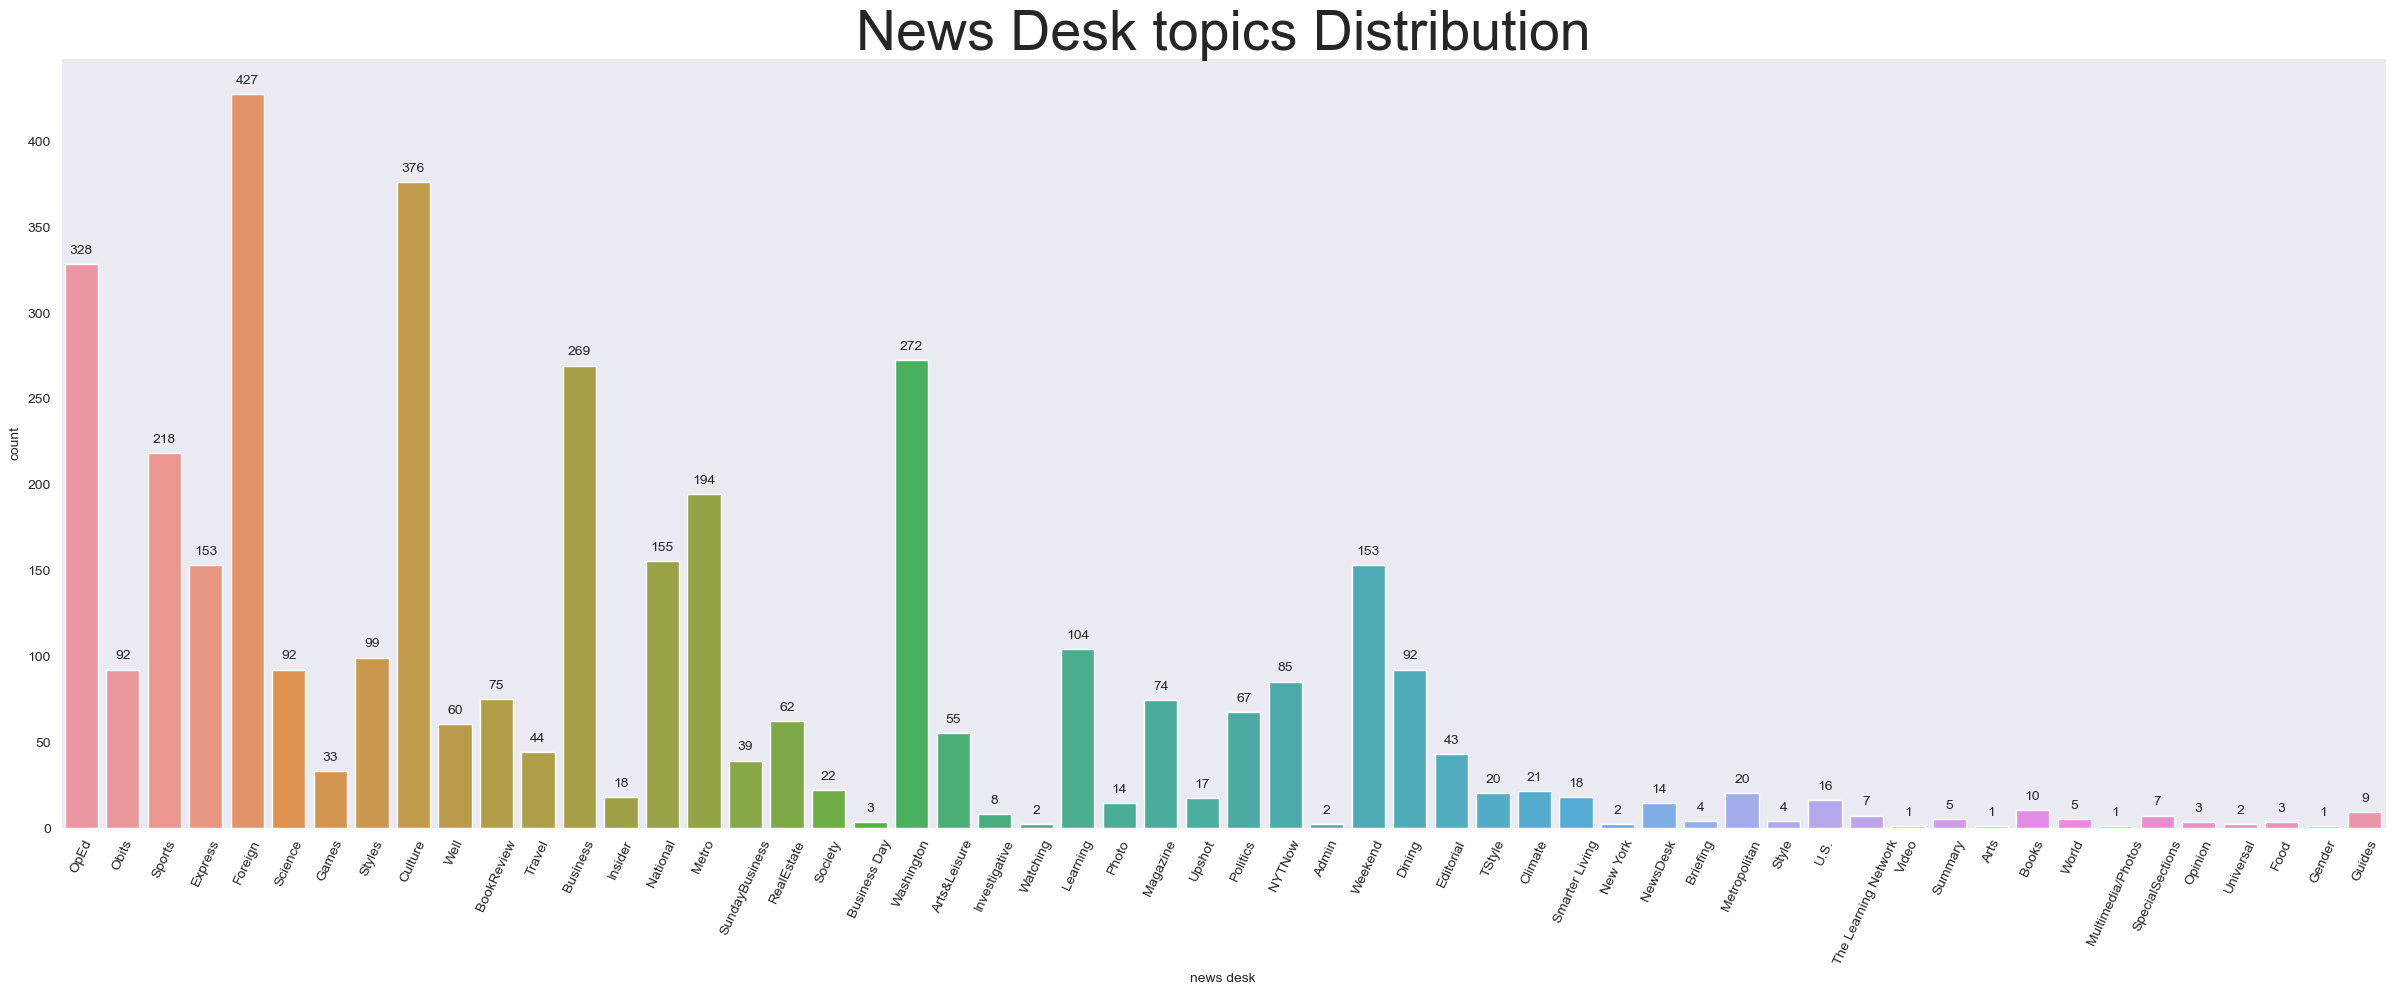

In [10]:
plt.figure(figsize=(30,10)) 
plt.title("News Desk topics Distribution",size=(40))
ax = sns.countplot(x="news desk", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
sns.set_style("darkgrid")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

In [11]:
#the column news desk is a close list of 56 topics. 

In [12]:
#let look at the connection to Type of Material:

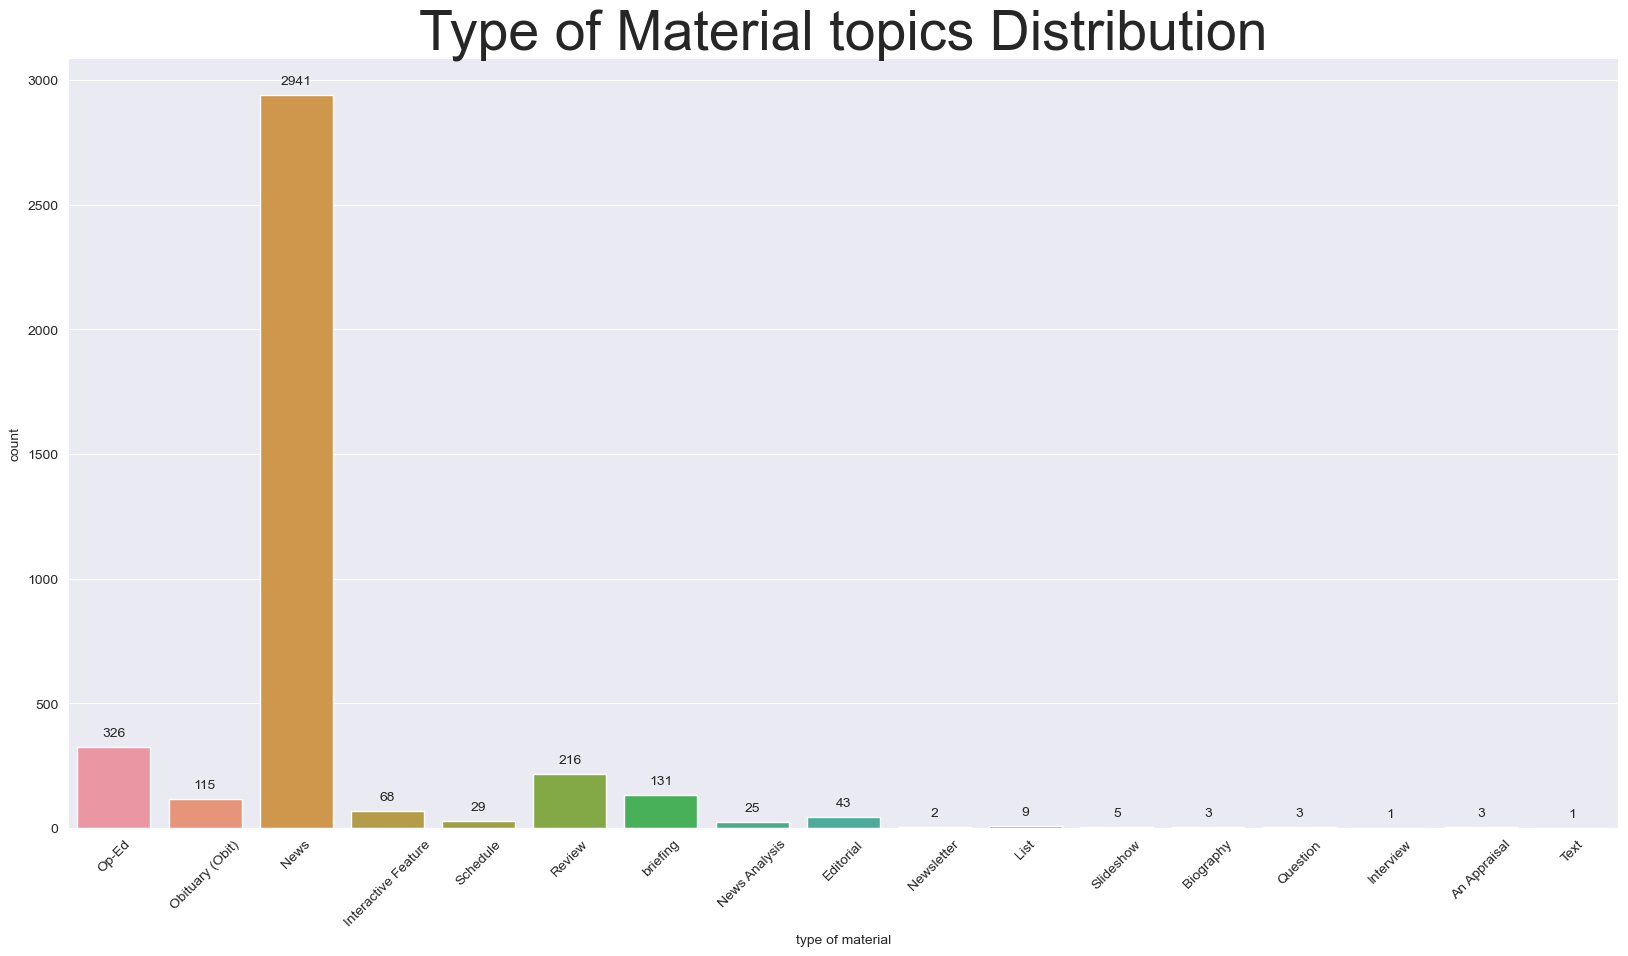

In [13]:
plt.figure(figsize=(20,10)) 
plt.title("Type of Material topics Distribution",size=(40))
ax = sns.countplot(x="type of material", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
sns.set_style("darkgrid")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

In [14]:
#there is 17 values in type of material close list.

In [54]:
#It can be seen that there is a categorization bias

In [15]:
def compare_objects(obj1, obj2):
    return obj1 == obj2

In [16]:
Comparison_ND_TOM = data[['news desk','type of material']]
   
old_string = 'Op-Ed' 
new_string = 'OpEd'
Comparison_ND_TOM['type of material'] = Comparison_ND_TOM['type of material'].replace(old_string, new_string)

old_string = 'Obituary (Obit)' 
new_string = 'Obits'
Comparison_ND_TOM['type of material'] = Comparison_ND_TOM['type of material'].replace(old_string, new_string)

old_string = 'Letter' 
new_string = 'Letters'
Comparison_ND_TOM['type of material'] = Comparison_ND_TOM['type of material'].replace(old_string, new_string)

Comparison_ND_TOM['comparison_result'] = Comparison_ND_TOM.apply(lambda row: compare_objects(row['news desk'], row['type of material']), axis=1)

C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\222522768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comparison_ND_TOM['type of material'] = Comparison_ND_TOM['type of material'].replace(old_string, new_string)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\222522768.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comparison_ND_TOM['type of material'] = Comparison_ND_TOM['type of material'].replace(old_string, new_string)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\

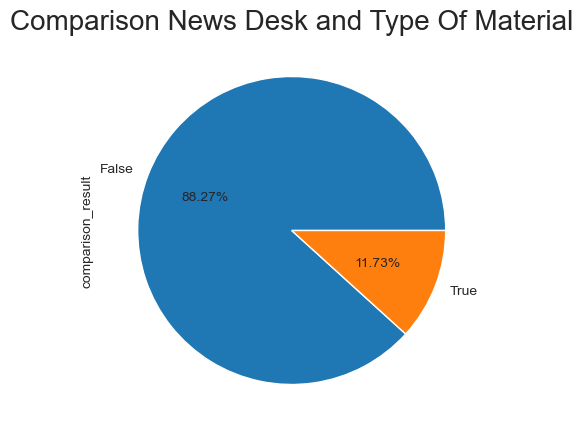

In [17]:
values=Comparison_ND_TOM['comparison_result'].value_counts()
plt.figure(1, figsize=(5,5))
plt.title('Comparison News Desk and Type Of Material',size=(20))
Comparison_ND_TOM['comparison_result'].value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%')
plt.show()

In [18]:
#there isnt a connection between those two attributes.

In [19]:
#lets look at the connection between news desk and Section Name:

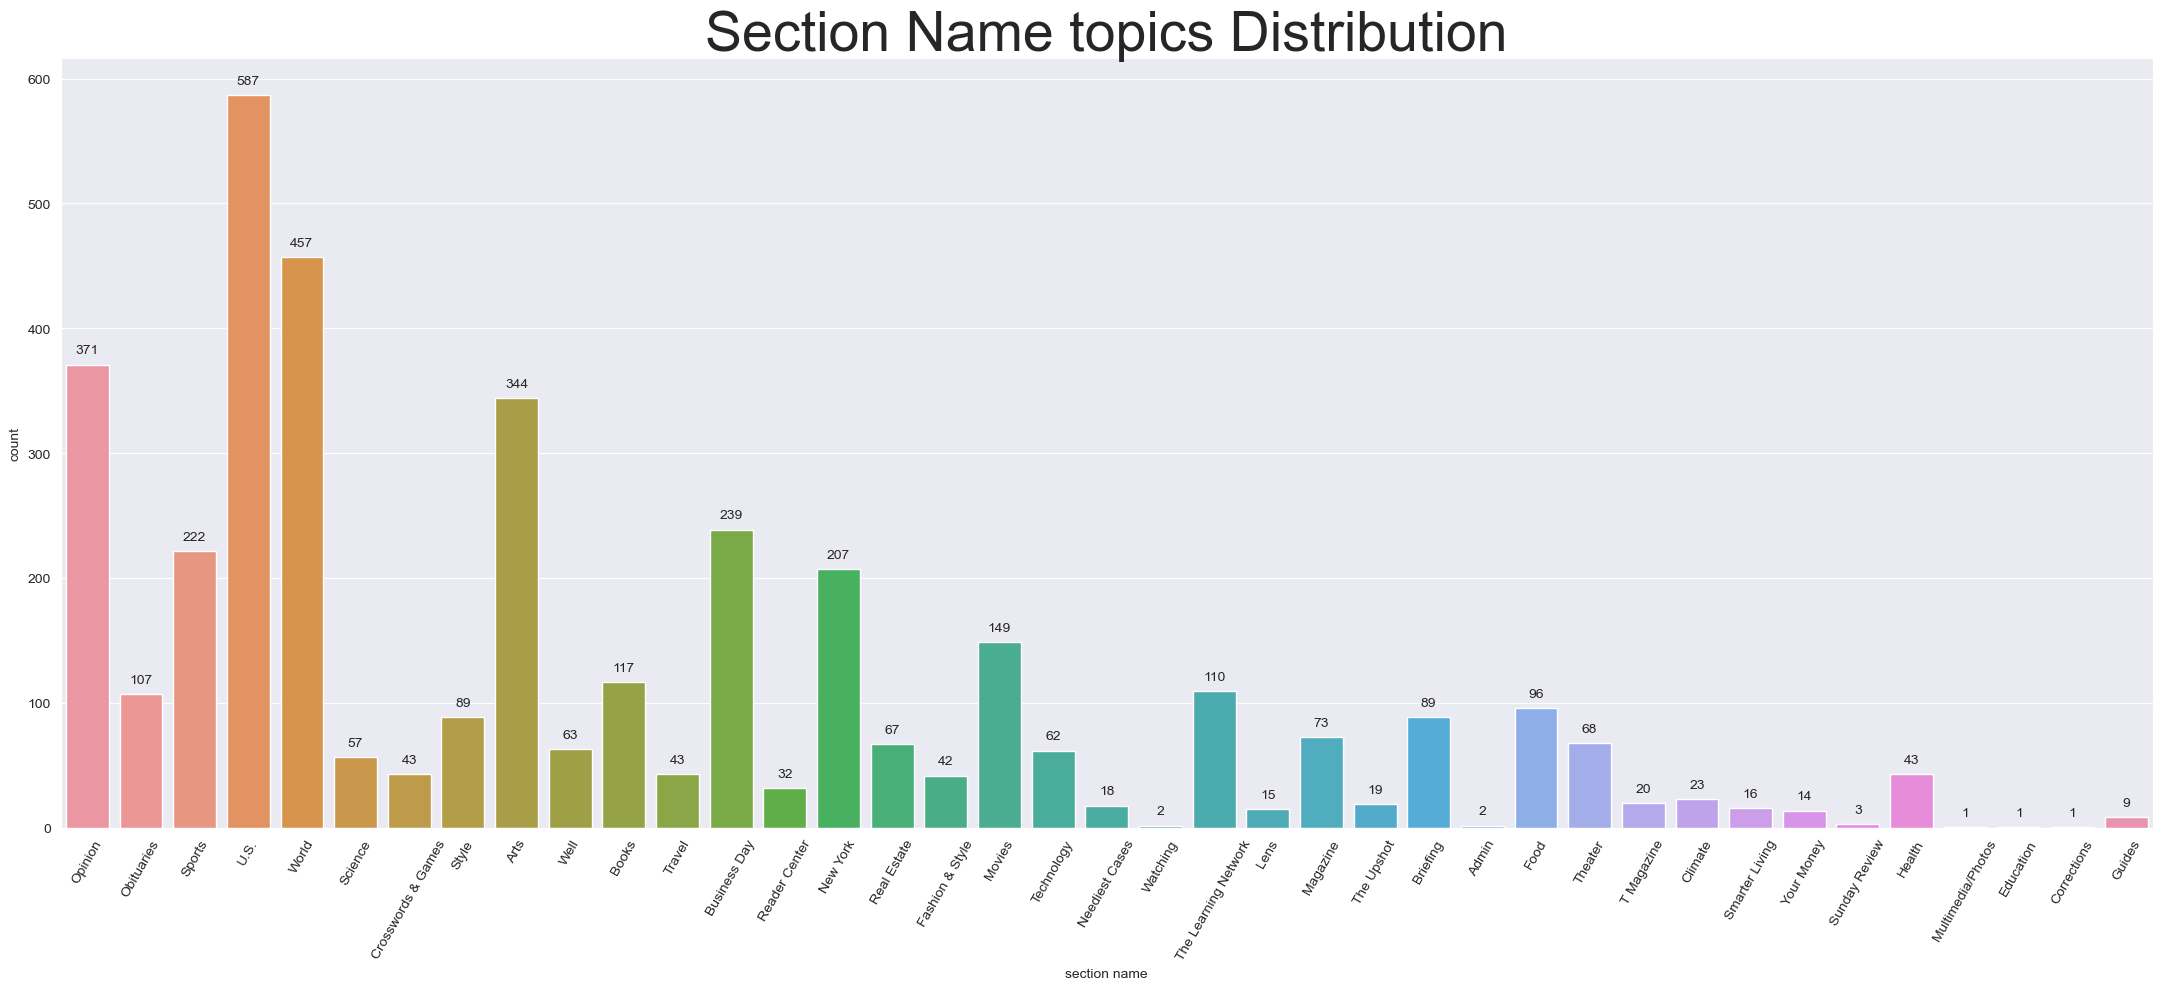

In [20]:
plt.figure(figsize=(27,10)) 
plt.title("Section Name topics Distribution",size=(40))
ax = sns.countplot(x="section name", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
sns.set_style("darkgrid")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

In [21]:
#there is 39 values in section name close list.

In [22]:
Comparison_ND_SM = data[['news desk','section name']]

old_string = 'Opinion' 
new_string = 'OpEd'
Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)

old_string = 'Obituaries' 
new_string = 'Obits'
Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)

old_string = 'Crosswords & Games' 
new_string = 'Games'
Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)

old_string = 'Style' 
new_string = 'Styles'
Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)

old_string = 'Books' 
new_string = 'BookReview'
Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)
   
old_string = 'Books' 
new_string = 'BookReview'
Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)

Comparison_ND_SM['comparison_result'] = Comparison_ND_SM.apply(lambda row: compare_objects(row['news desk'], row['section name']), axis=1)

C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\1314141233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\1314141233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comparison_ND_SM['section name'] = Comparison_ND_SM['section name'].replace(old_string, new_string)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\1314141233.py:13: 

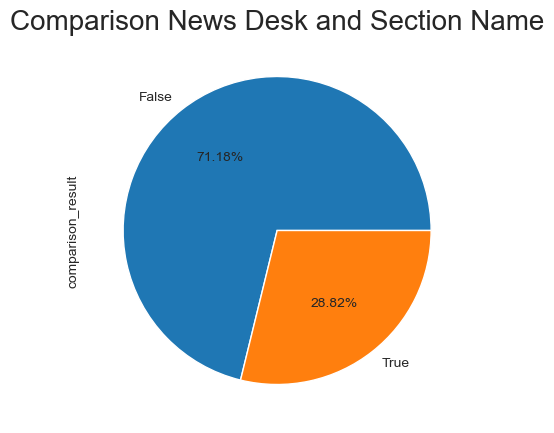

In [23]:
values=Comparison_ND_SM['comparison_result'].value_counts()
plt.figure(1, figsize=(5,5))
plt.title('Comparison News Desk and Section Name',size=(20))
Comparison_ND_SM['comparison_result'].value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%')
plt.show()

In [24]:
#there isnt a definite connection between those two attributes.

In [25]:
#lets look at the connection between type of material and Section Name:

In [26]:
Comparison_TOM_SM = data[['type of material','section name']]

old_string = 'Opinion' 
new_string = 'Op-Ed'
Comparison_TOM_SM['section name'] = Comparison_TOM_SM['section name'].replace(old_string, new_string)

old_string = 'Obituaries' 
new_string = 'Obituary (Obit)'
Comparison_TOM_SM['section name'] = Comparison_TOM_SM['section name'].replace(old_string, new_string)

old_string = 'Briefing' 
new_string = 'briefing'
Comparison_TOM_SM['section name'] = Comparison_TOM_SM['section name'].replace(old_string, new_string)

Comparison_TOM_SM['comparison_result'] = Comparison_TOM_SM.apply(lambda row: compare_objects(row['type of material'], row['section name']), axis=1)

C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\3991183505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comparison_TOM_SM['section name'] = Comparison_TOM_SM['section name'].replace(old_string, new_string)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\3991183505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comparison_TOM_SM['section name'] = Comparison_TOM_SM['section name'].replace(old_string, new_string)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\3991183505.py:

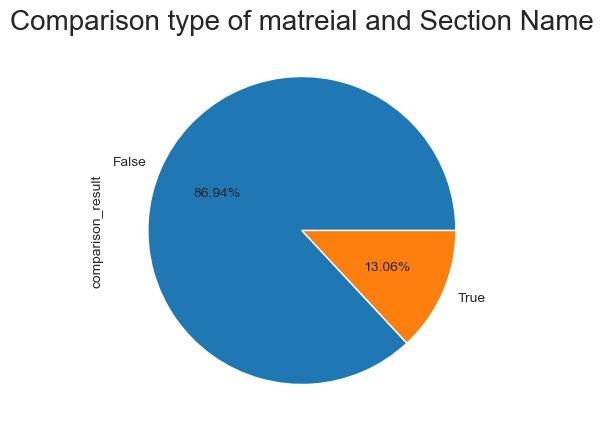

In [27]:
values=Comparison_TOM_SM['comparison_result'].value_counts()
plt.figure(1, figsize=(5,5))
plt.title('Comparison type of matreial and Section Name',size=(20))
Comparison_TOM_SM['comparison_result'].value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%')
plt.show()

In [28]:
#there isnt a definite connection between those two attributes.

In [29]:
count_news_desk_sub_per_original=data[["headline",'news desk','section name']].groupby(['news desk','section name']).count()
count_news_desk_sub_per_original.head(60)

headline
news desk     section name                  
Admin         Admin                        2
Arts          Arts                         1
Arts&Leisure  Arts                        34
              Movies                      13
              Theater                      8
BookReview    Books                       74
              Style                        1
Books         Books                       10
Briefing      Briefing                     4
Business      Books                        4
              Business Day               183
              Obituaries                   1
              Real Estate                  5
              Style                        1
              Technology                  58
              U.S.                         1
              World                        2
              Your Money                  14
Business Day  Business Day                 3
Climate       Climate                     21
Culture       Arts                       224
              Books                       21
              Movies                      81
              Obituaries                   5
              Reader Center                1
              Theater                     43
              World                        1
Dining        Food                        92
Editorial     Opinion                     43
Express       Arts                         7
              Books                        1
              Business Day                 7
              Health                       4
              Movies                       2
              New York                     7
              Obituaries                   1
              Science                      7
              Sports                       3
              Style                        1
              Technology                   2
              U.S.                       102
              World                        9
Food          Food                         3
Foreign       Obituaries                   5
              World                      422
Games         Crosswords & Games          33
Gender        U.S.                         1
Guides        Guides                       9
Insider       Reader Center               18
Investigative Technology                   1
              U.S.                         6
              World                        1
Learning      Education                    1
              The Learning Network       103
Magazine      Magazine                    73
              Well                         1
Metro         Neediest Cases              16
              New York                   177
              U.S.                         1
Metropolitan  New York                    20

In [30]:
#there isnt a conntection between all Y columns.
#It can be seen in the last table that the existing division could be incorrect because the section names appears in several news desk

### Keywords

In [31]:
#The keywords came as a long string, so we decided to look at the first 3 words(with the highest relevance) and separate them into separate columns

In [32]:
data['keywords'] = data['keywords'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data['first keyword'] = data['keywords'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
data['second keyword'] = data['keywords'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
data['third keyword'] = data['keywords'].apply(lambda x: x[2] if isinstance(x, list) and len(x) > 2 else None)

C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\2607786615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keywords'] = data['keywords'].apply(lambda x: eval(x) if isinstance(x, str) else x)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\2607786615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first keyword'] = data['keywords'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
C:\Users\liron firuz\AppData\Local\Temp\ipykernel_16716\2607786615.py:3: 

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 4481
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   headline          3921 non-null   object
 1   abstract          3921 non-null   object
 2   pub date          3921 non-null   object
 3   original          3921 non-null   object
 4   person rank       3921 non-null   int64 
 5   keywords          3921 non-null   object
 6   lead paragraph    3921 non-null   object
 7   news desk         3921 non-null   object
 8   section name      3921 non-null   object
 9   type of material  3921 non-null   object
 10  first keyword     3675 non-null   object
 11  second keyword    3565 non-null   object
 12  third keyword     3365 non-null   object
dtypes: int64(1), object(12)
memory usage: 428.9+ KB


In [34]:
data_test = data.dropna()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3365 entries, 0 to 4481
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   headline          3365 non-null   object
 1   abstract          3365 non-null   object
 2   pub date          3365 non-null   object
 3   original          3365 non-null   object
 4   person rank       3365 non-null   int64 
 5   keywords          3365 non-null   object
 6   lead paragraph    3365 non-null   object
 7   news desk         3365 non-null   object
 8   section name      3365 non-null   object
 9   type of material  3365 non-null   object
 10  first keyword     3365 non-null   object
 11  second keyword    3365 non-null   object
 12  third keyword     3365 non-null   object
dtypes: int64(1), object(12)
memory usage: 368.0+ KB


In [35]:
#first keyword explor

In [36]:
num_of_first_keyword=data_test[['headline','first keyword']].groupby(['first keyword']).count()
num_of_first_keyword.sort_values(by='headline',ascending=False)

headline
first keyword                                  
Movies                                      132
United States Politics and Government       111
Books and Literature                         87
Trump, Donald J                              73
Real Estate and Housing (Residential)        65
...                                         ...
Inventions and Patents                        1
Iordachescu, Eugeniu                          1
Iraq War (2003-11)                            1
Ireland                                       1
Kumalo, Dumisani                              1

[1145 rows x 1 columns]

In [37]:
min_value = num_of_first_keyword['headline'].min()
max_value = num_of_first_keyword['headline'].max()
mean_value = num_of_first_keyword['headline'].mean()
median_value = num_of_first_keyword['headline'].median()

print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.0f}")

Min: 1
Max: 132
Mean: 2.94
Median: 1


In [38]:
# second keyword explor

In [39]:
num_of_second_keyword=data_test[['headline','second keyword']].groupby(['second keyword']).count()
num_of_second_keyword.sort_values(by='headline',ascending=False)

headline
second keyword                                 
United States Politics and Government        82
Deaths (Obituaries)                          68
Shutdowns (Institutional)                    56
Politics and Government                      55
Trump, Donald J                              43
...                                         ...
Harlem (Manhattan, NY)                        1
Hark (Book)                                   1
Hardwicke, Catherine                          1
Hannity, Sean                                 1
von Heyl, Charline                            1

[1580 rows x 1 columns]

In [40]:
min_value = num_of_second_keyword['headline'].min()
max_value = num_of_second_keyword['headline'].max()
mean_value = num_of_second_keyword['headline'].mean()
median_value = num_of_second_keyword['headline'].median()

print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.0f}")

Min: 1
Max: 82
Mean: 2.13
Median: 1


In [41]:
# third keyword explor

In [42]:
num_of_third_keyword =data_test[['headline','third keyword']].groupby(['third keyword']).count()
num_of_third_keyword.sort_values(by='headline',ascending=False)

headline
third keyword                                  
United States Politics and Government        93
Shutdowns (Institutional)                    49
Politics and Government                      43
Trump, Donald J                              40
Democratic Party                             27
...                                         ...
Cal Performances                              1
Cala, Caroline (Author)                       1
Caldecott Medal                               1
Calderon,  Paul                               1
Krasinski, John                               1

[1822 rows x 1 columns]

In [43]:
min_value = num_of_third_keyword['headline'].min()
max_value = num_of_third_keyword['headline'].max()
mean_value = num_of_third_keyword['headline'].mean()
median_value = num_of_third_keyword['headline'].median()

print(f"Min: {min_value:.0f}")
print(f"Max: {max_value:.0f}")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.0f}")

Min: 1
Max: 93
Mean: 1.85
Median: 1


In [44]:
#You can see that the frequency of most words is one

In [45]:
#Not all articles have 3 keywords, so we will only use the first keyword that is most relevant to that article

## Conclusions

In [46]:
data

headline  \
0                        1919: The Year of the Crack-Up   
1                         In Search of Lost Screen Time   
2     Warren Wells, Star Receiver With a Derailed Ca...   
3                          2019: The Year of the Wolves   
4                        Why Trump Reigns as King Cyrus   
...                                                 ...   
4477  As Trump Demands His Wall, Lawmakers Plead for...   
4478  U.S. Appears to Soften Timing for List of Nort...   
4479  Dusan Makavejev, 86. Eyebrow-Raising Serbian D...   
4480  A Year Into the Overlooked Project, Widening t...   
4481        The Alarming Allure of Australia’s Brumbies   

                                               abstract  \
0     From the Treaty of Versailles to Prohibition, ...   
1     Imagine what we could do with our money, and h...   
2     Wells was a deep threat for the vaunted Oaklan...   
3         Can the Constitution withstand the partisans?   
4     The Christian right doesn’t like the president...   
...                                                 ...   
4477  Lawmakers reacted with concern and bewildermen...   
4478  A top diplomat said the Trump administration m...   
4479  His films, among them “WR: Mysteries of the Or...   
4480  In the past year, The Times published obituari...   
4481  The environment is being sacrificed for a nati...   

                      pub date                original  person rank  \
0     2019-01-01T00:00:03+0000           By Ted Widmer            1   
1     2019-01-01T00:00:07+0000       By Paul Greenberg            1   
2     2019-01-01T00:08:04+0000    By Daniel E. Slotnik            1   
3     2019-01-01T00:15:31+0000         By David Brooks            1   
4     2019-01-01T00:29:12+0000    By Katherine Stewart            1   
...                        ...                     ...          ...   
4477  2019-01-31T23:41:47+0000       By Emily Cochrane            1   
4478  2019-01-31T23:47:23+0000          By Edward Wong            1   
4479  2019-01-31T23:55:38+0000      By Neil Genzlinger            1   
4480  2019-01-31T23:57:57+0000       By Amisha Padnani            1   
4481  2019-01-31T23:59:55+0000  By A. Odysseus Patrick            1   

                                               keywords  \
0     [United States Politics and Government, New Ye...   
1                           [Smartphones, Social Media]   
2     [Wells, Warren (1942-2018), Football, Deaths (...   
3     [Trump, Donald J, United States Politics and G...   
4     [United States Politics and Government, Bible,...   
...                                                 ...   
4477  [Border Barriers, Trump, Donald J, United Stat...   
4478  [United States International Relations, ARMS C...   
4479  [Makavejev, Dusan, Deaths (Obituaries), Movies...   
4480  [Women and Girls, Race and Ethnicity, Gorman, ...   
4481              [Invasive Species, Horses, Australia]   

                                         lead paragraph   news desk  \
0     Throughout 2019, The New York Times Opinion se...        OpEd   
1     More than three-quarters of all Americans own ...        OpEd   
2     Warren Wells, a former wide receiver who becam...       Obits   
3     In Willa Cather’s novel “My Antonia,” there ar...        OpEd   
4     The month before the 2018 midterms, a thousand...        OpEd   
...                                                 ...         ...   
4477  WASHINGTON — President Trump proclaimed on Thu...  Washington   
4478  WASHINGTON — A top American diplomat signaled ...  Washington   
4479  Dusan Makavejev, a Serbian director whose movi...       Obits   
4480  Times Insider explains who we are and what we ...     Insider   
4481  SYDNEY, Australia — Since this country’s found...        OpEd   

       section name type of material                          first keyword  \
0           Opinion            Op-Ed  United States Politics and Government   
1           Opinion            Op-Ed                    

In [47]:
#According to the findings, we will cut the data into the relevant columns

In [51]:
data_final = data[["headline","abstract","lead paragraph","first keyword","keywords","section name"]]
data_final

headline  \
0                        1919: The Year of the Crack-Up   
1                         In Search of Lost Screen Time   
2     Warren Wells, Star Receiver With a Derailed Ca...   
3                          2019: The Year of the Wolves   
4                        Why Trump Reigns as King Cyrus   
...                                                 ...   
4477  As Trump Demands His Wall, Lawmakers Plead for...   
4478  U.S. Appears to Soften Timing for List of Nort...   
4479  Dusan Makavejev, 86. Eyebrow-Raising Serbian D...   
4480  A Year Into the Overlooked Project, Widening t...   
4481        The Alarming Allure of Australia’s Brumbies   

                                               abstract  \
0     From the Treaty of Versailles to Prohibition, ...   
1     Imagine what we could do with our money, and h...   
2     Wells was a deep threat for the vaunted Oaklan...   
3         Can the Constitution withstand the partisans?   
4     The Christian right doesn’t like the president...   
...                                                 ...   
4477  Lawmakers reacted with concern and bewildermen...   
4478  A top diplomat said the Trump administration m...   
4479  His films, among them “WR: Mysteries of the Or...   
4480  In the past year, The Times published obituari...   
4481  The environment is being sacrificed for a nati...   

                                         lead paragraph  \
0     Throughout 2019, The New York Times Opinion se...   
1     More than three-quarters of all Americans own ...   
2     Warren Wells, a former wide receiver who becam...   
3     In Willa Cather’s novel “My Antonia,” there ar...   
4     The month before the 2018 midterms, a thousand...   
...                                                 ...   
4477  WASHINGTON — President Trump proclaimed on Thu...   
4478  WASHINGTON — A top American diplomat signaled ...   
4479  Dusan Makavejev, a Serbian director whose movi...   
4480  Times Insider explains who we are and what we ...   
4481  SYDNEY, Australia — Since this country’s found...   

                              first keyword  \
0     United States Politics and Government   
1                               Smartphones   
2                 Wells, Warren (1942-2018)   
3                           Trump, Donald J   
4     United States Politics and Government   
...                                     ...   
4477                        Border Barriers   
4478  United States International Relations   
4479                       Makavejev, Dusan   
4480                        Women and Girls   
4481                       Invasive Species   

                                               keywords   section name  
0     [United States Politics and Government, New Ye...        Opinion  
1                           [Smartphones, Social Media]        Opinion  
2     [Wells, Warren (1942-2018), Football, Deaths (...     Obituaries  
3     [Trump, Donald J, United States Politics and G...        Opinion  
4     [United States Politics and Government, Bible,...        Opinion  
...                                                 ...            ...  
4477  [Border Barriers, Trump, Donald J, United Stat...           U.S.  
4478  [United States International Relations, ARMS C...          World  
4479  [Makavejev, Dusan, Deaths (Obituaries), Movies...     Obituaries  
4480  [Women and Girls, Race and Ethnicity, Gorman, ...  Reader Center  
4481              [Invasive Species, Horses, Australia]        Opinion  

[3921 rows x 6 columns]

In [52]:
data_final.to_csv('Data_after_preprocessing.csv', encoding='utf-8-sig', index=False)

In [53]:
data_test = data[["headline","abstract","lead paragraph","first keyword","section name"]]
data_test.to_csv('Data test.csv', encoding='utf-8-sig', index=False)